In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 1. EDA 

In [4]:
df.duplicated().sum()

165

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(32416, 12)

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 1.1 DISTRIBUTION ANALYSIS

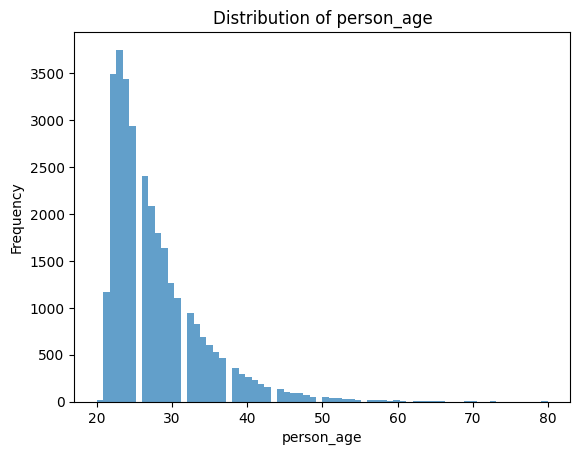

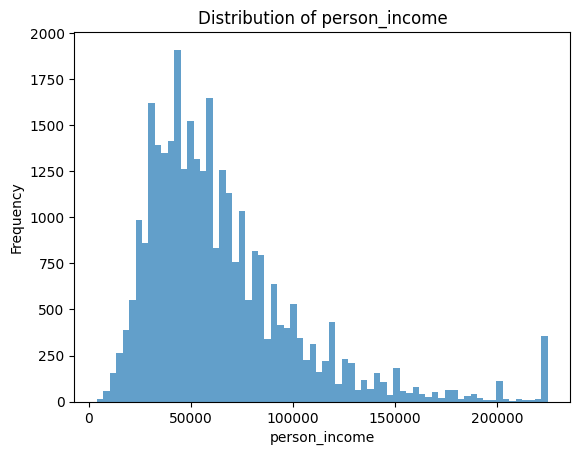

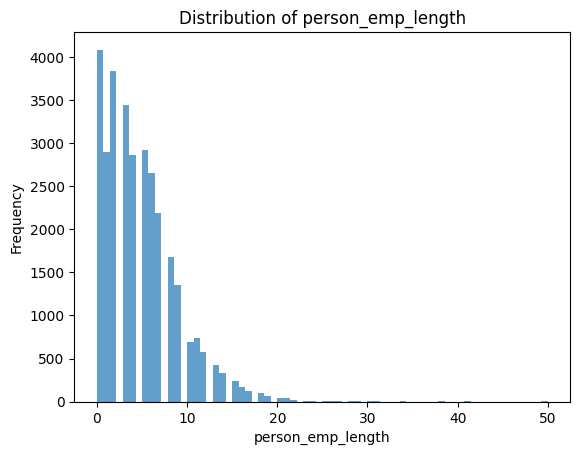

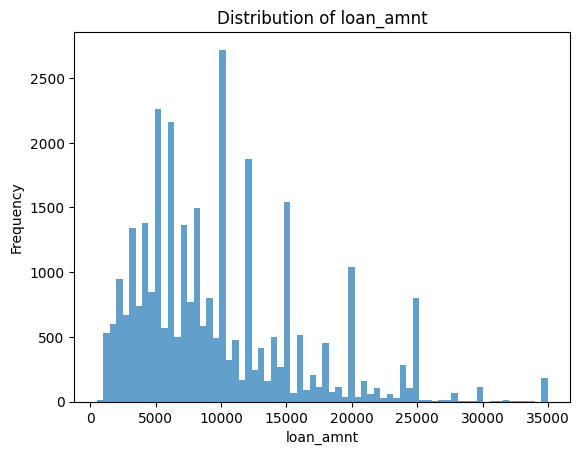

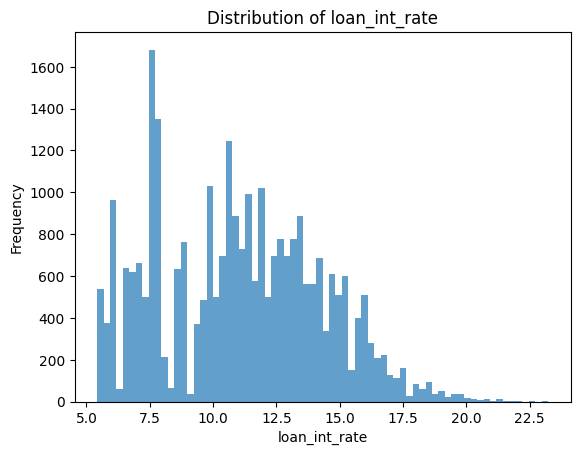

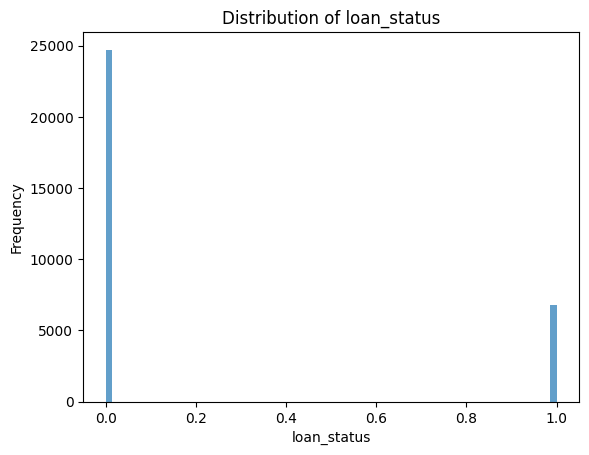

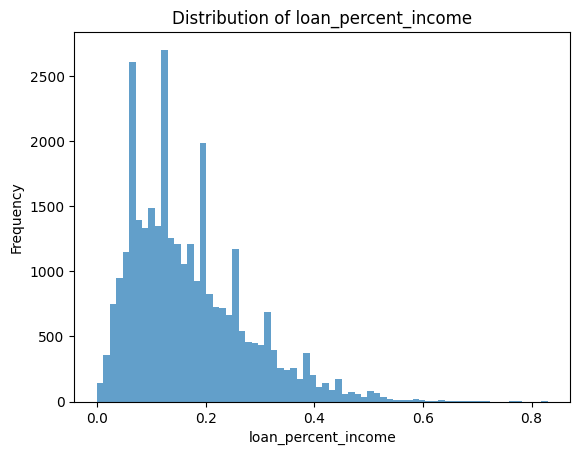

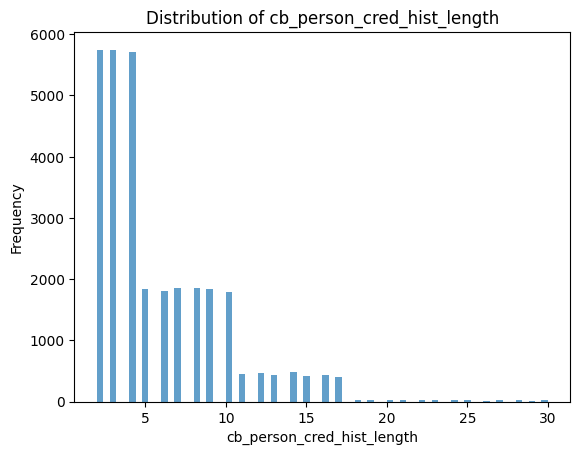

In [23]:
numeric_cols = df.select_dtypes(include=["float64","int64"]).columns

for col in numeric_cols:
    plt.hist(df[col], bins=70, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.show()

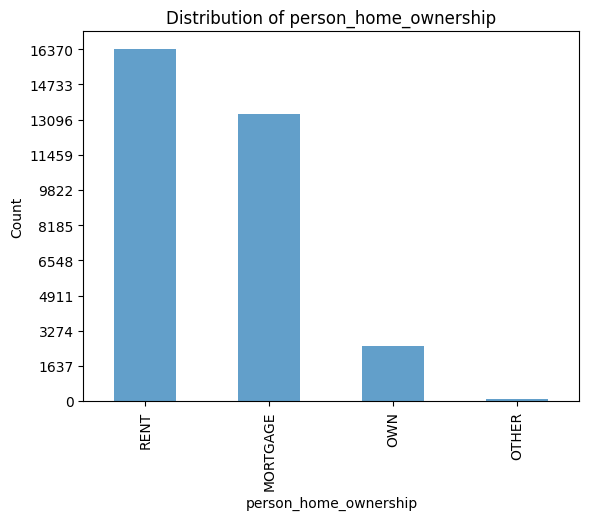

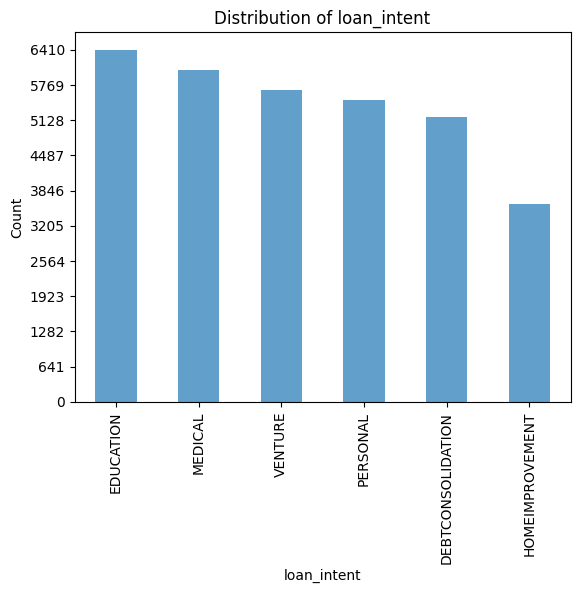

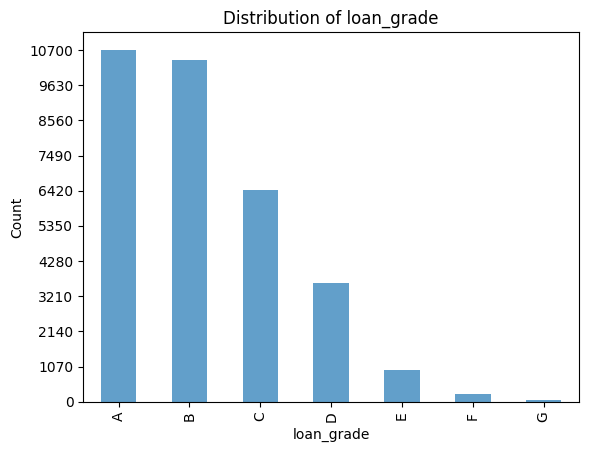

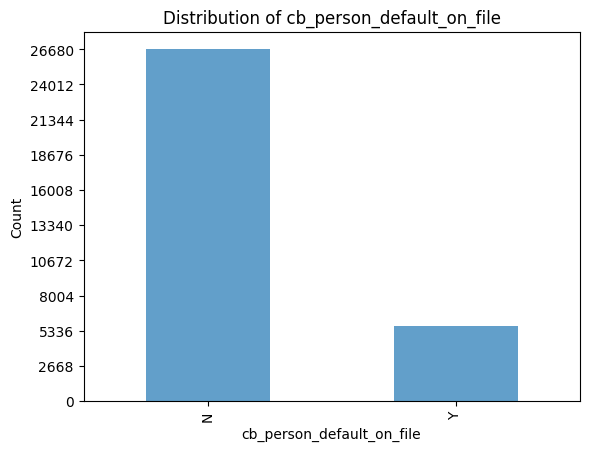

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    value_counts = df[col].value_counts()

    value_counts.plot(kind='bar', alpha=0.7)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
  
    max_count = value_counts.max()
    plt.yticks(np.arange(0, max_count + 1, max(1, max_count // 10))) 
    
    plt.show()


### 1.2 CORRELATION ANALYSIS

/var/folders/2n/w4ltzfmx2tx7rpcv2z1fm1gm0000gn/T/ipykernel_44757/2621561903.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


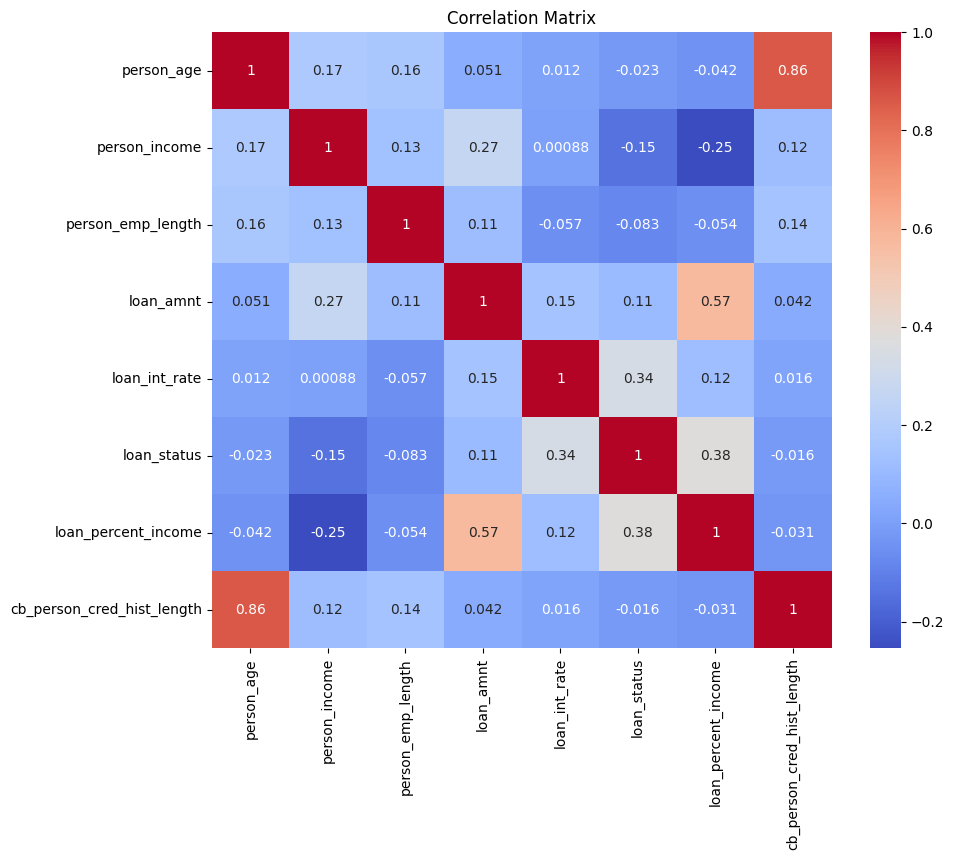

In [12]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 1.3 Target Variable Analysis

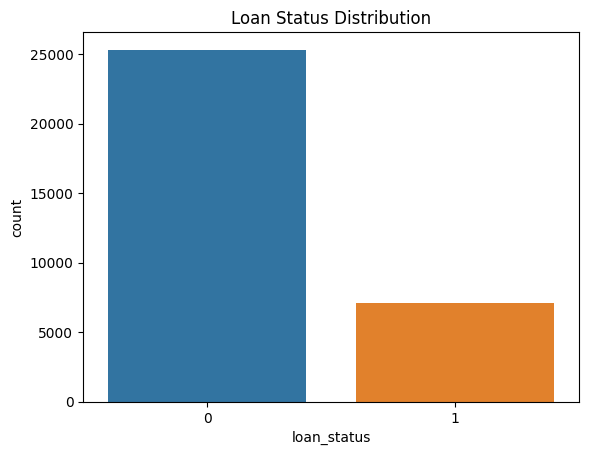

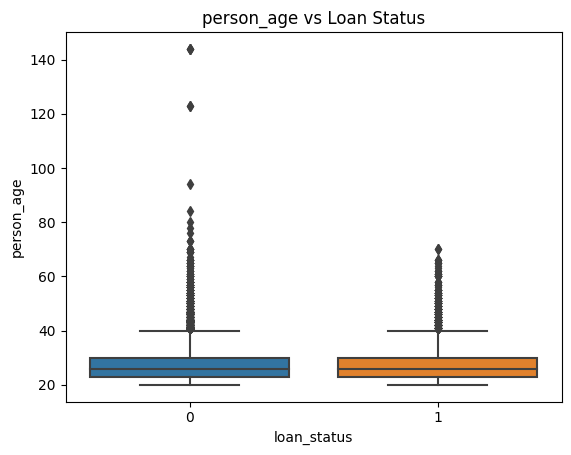

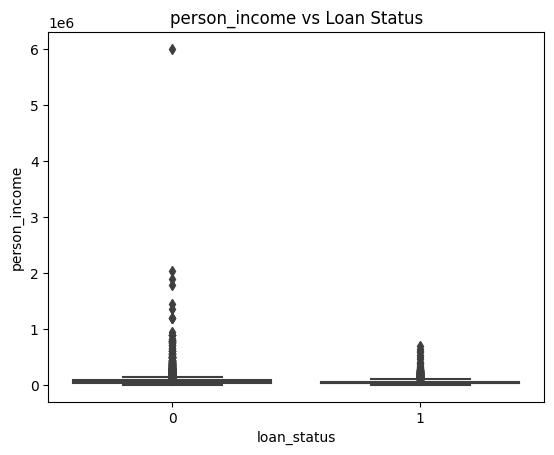

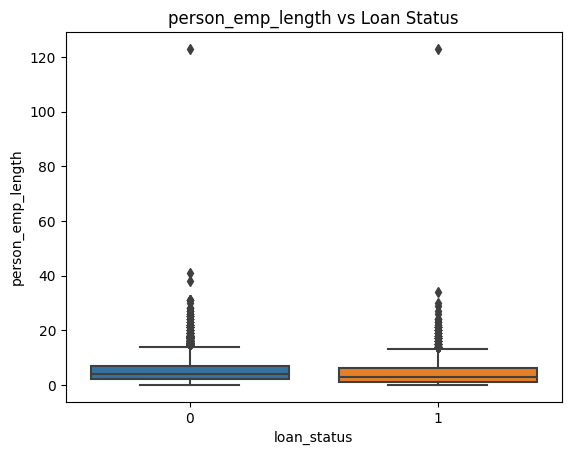

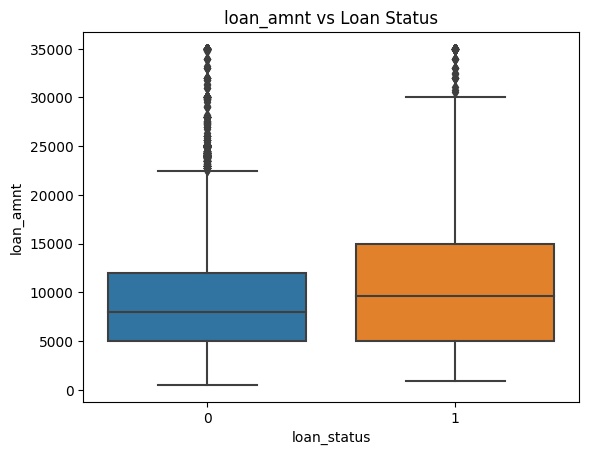

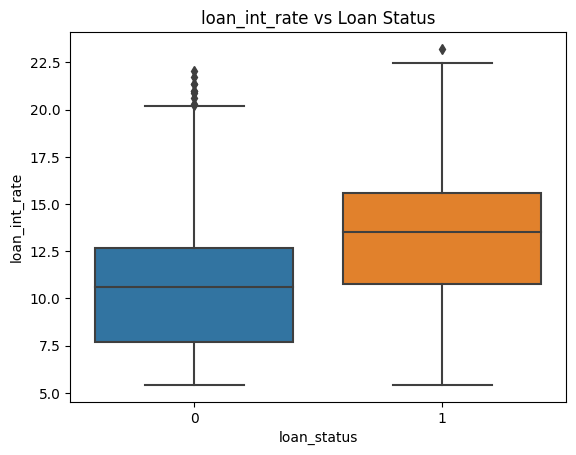

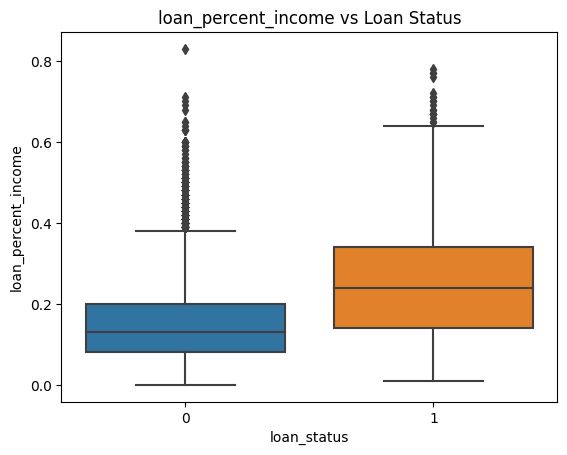

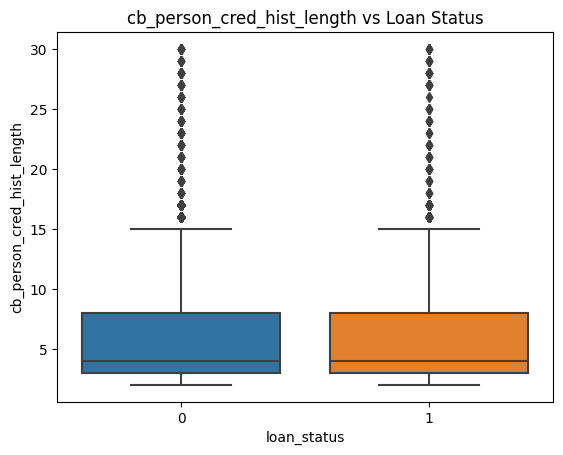

In [13]:
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

for col in numeric_cols:
    if col != 'loan_status':
        sns.boxplot(data=df, x='loan_status', y=col)
        plt.title(f'{col} vs Loan Status')
        plt.show()


In [19]:
age_threshold = 80
emp_length_threshold = 50
threshold_income = df['person_income'].quantile(0.99)


df['person_income'] = np.where(df['person_income'] > threshold_income, threshold_income, df['person_income'])
df['person_age'] = np.where(df['person_age'] > age_threshold, age_threshold, df['person_age'])
df['person_emp_length'] = np.where(df['person_emp_length'] > emp_length_threshold, emp_length_threshold, df['person_emp_length'])


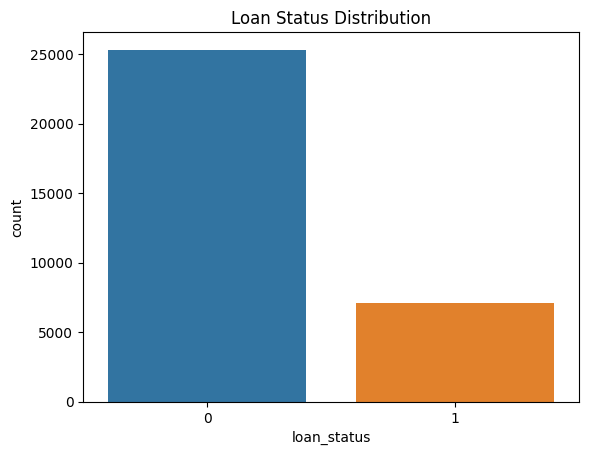

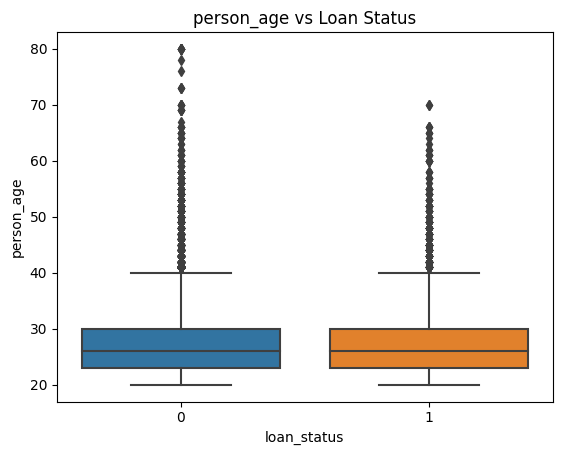

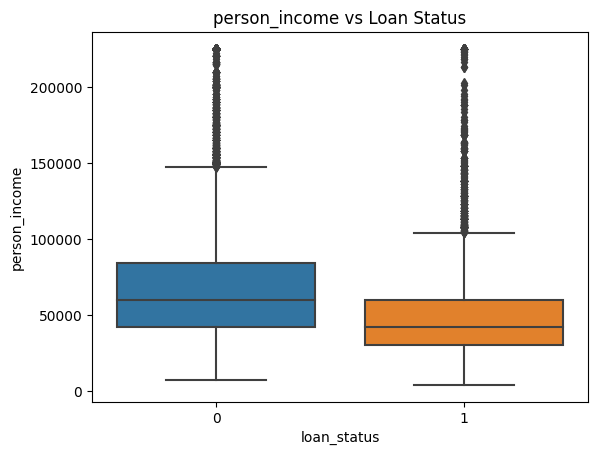

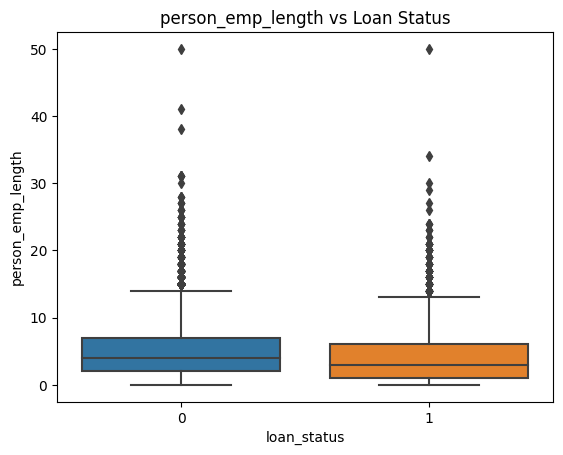

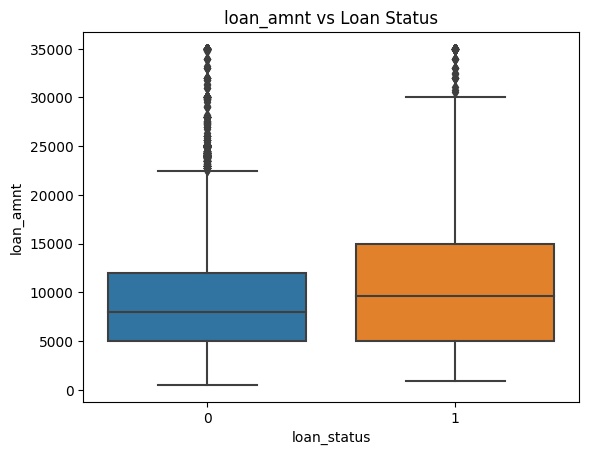

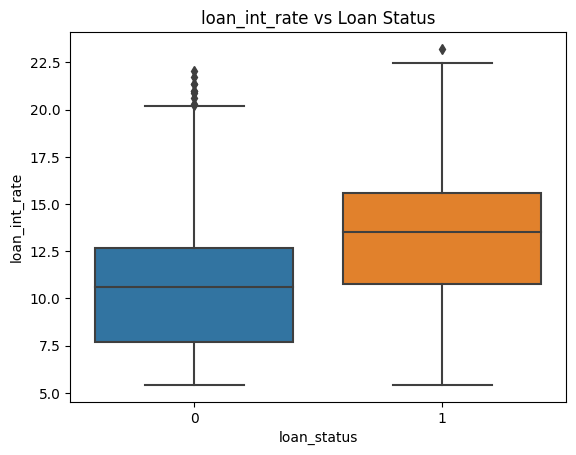

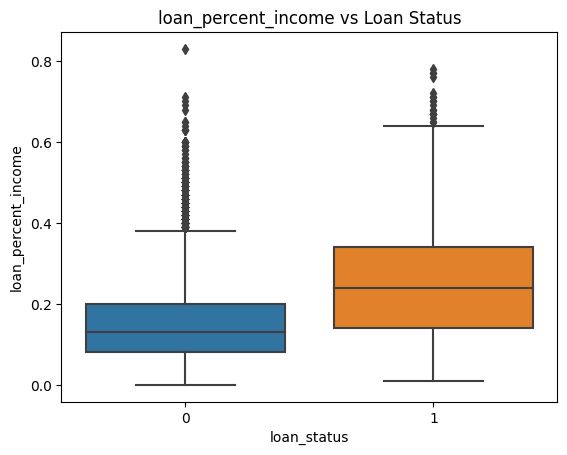

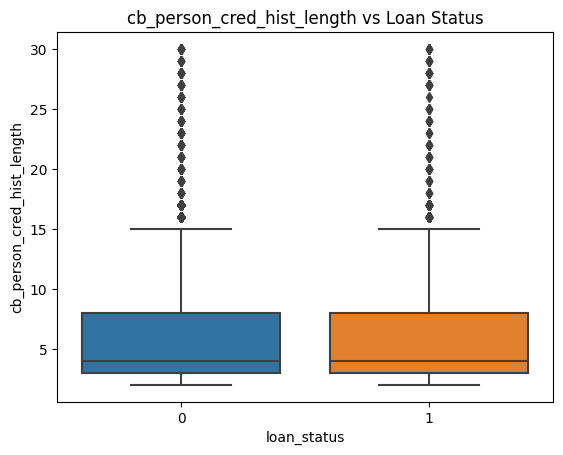

In [20]:
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

for col in numeric_cols:
    if col != 'loan_status':
        sns.boxplot(data=df, x='loan_status', y=col)
        plt.title(f'{col} vs Loan Status')
        plt.show()


In [21]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [22]:
df = df.dropna(subset=['person_emp_length'])


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3028
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [24]:
median_loan_int_rate_by_status = df.groupby('loan_status')['loan_int_rate'].median()


df['loan_int_rate'] = df.apply(
    lambda row: median_loan_int_rate_by_status[row['loan_status']] if pd.isnull(row['loan_int_rate']) else row['loan_int_rate'],
    axis=1
)

df.isnull().sum()



person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [27]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000
mean,27.749849,64938.269308,4.785880,9665.152717,11.060968,0.215928,0.169660,5.816201
std,6.247634,37827.761250,4.053184,6336.661842,3.092956,0.411471,0.106324,4.064782
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,39456.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,56000.000000,4.000000,8000.000000,10.750000,0.000000,0.150000,4.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.470000,0.000000,0.230000,8.000000
max,80.000000,225000.000000,50.000000,35000.000000,23.220000,1.000000,0.830000,30.000000
